# Hyperparameter Tuning using HyperDrive

TODO: Import Dependencies. In the cell below, import all the dependencies that you will need to complete the project.

In [32]:
!pip install seaborn

## Dataset

TODO: Get data. In the cell below, write code to access the data you will be using in this project. Remember that the dataset needs to be external.

In [33]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '6971f5ac-8af1-446e-8034-05acea24681f'
resource_group = 'aml-quickstarts-134159'
workspace_name = 'quick-starts-ws-134159'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='creditcard')
dataset.to_pandas_dataframe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Text(0.5, 1.0, 'Balanced Classes')

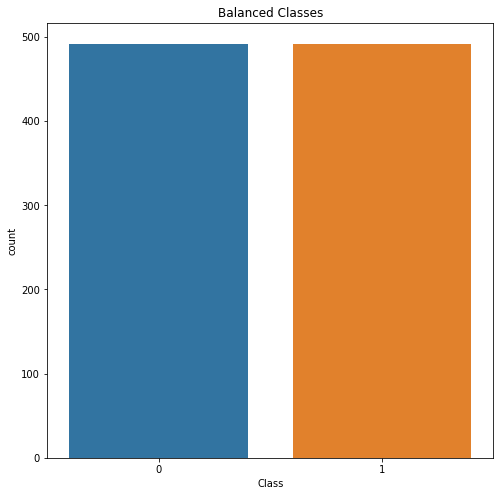

In [34]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#this code snippet is based on the code from this article -> https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb 
ds = dataset.to_pandas_dataframe()
shuffled_df = ds.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
fraud_df = shuffled_df.loc[shuffled_df['Class'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_fraud_df = shuffled_df.loc[shuffled_df['Class'] == 0].sample(n=492,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([fraud_df, non_fraud_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=normalized_df)
plt.title('Balanced Classes')

In [35]:
# the code is based on the official Microsoft documentation, which can be found 
# here -> https://docs.microsoft.com/en-us/azure/machine-learning/how-to-create-register-datasets#create-a-dataset-from-pandas-dataframe 

local_path = './prepared.csv'
normalized_df.to_csv(local_path)

# get the datastore to upload prepared data
datastore = workspace.get_default_datastore()

# upload the local file from src_dir to the target_path in datastore
datastore.upload(src_dir='./', target_path='./')

# create a dataset referencing the cloud location
dataset = Dataset.Tabular.from_delimited_files(path = [(datastore, ('./prepared.csv'))])

Uploading an estimated of 11 files
Target already exists. Skipping upload for automl.ipynb
Target already exists. Skipping upload for automl.ipynb.amltemp
Target already exists. Skipping upload for automl.log
Target already exists. Skipping upload for azureml_automl.log
Target already exists. Skipping upload for hyperparameter_tuning.ipynb
Target already exists. Skipping upload for prepared.csv
Target already exists. Skipping upload for README.md
Target already exists. Skipping upload for .ipynb_aml_checkpoints/automl-checkpoint2021-0-9-23-55-9.ipynb
Target already exists. Skipping upload for .ipynb_aml_checkpoints/hyperparameter_tuning-checkpoint2021-0-10-1-35-23.ipynb
Target already exists. Skipping upload for .ipynb_checkpoints/automl-checkpoint.ipynb
Target already exists. Skipping upload for .ipynb_checkpoints/hyperparameter_tuning-checkpoint.ipynb
Uploaded 0 files


In [36]:
from azureml.core import Experiment

# choose a name for experiment
experiment_name = 'lab3-experiment'

exp = Experiment(workspace=workspace, name=experiment_name)
exp

Name,Workspace,Report Page,Docs Page
lab3-experiment,quick-starts-ws-134159,Link to Azure Machine Learning studio,Link to Documentation


## Hyperdrive Configuration

TODO: Explain the model you are using and the reason for chosing the different hyperparameters, termination policy and config settings.

In [37]:
from azureml.core.compute import ComputeTarget, AmlCompute

# the code sninppet is based on official Microsoft documentation, which can be found
# here -> https://docs.microsoft.com/en-us/azure/machine-learning/how-to-create-attach-compute-cluster?tabs=python
from azureml.core.compute_target import ComputeTargetException

# A name for the cluster
cpu_cluster_name = "lab3-cluster"

# Verification that cluster does not exist yet
try:
    cpu_cluster = ComputeTarget(workspace=workspace, name=cpu_cluster_name)
    print('The cluster already exists')
except ComputeTargetException:
    compute_config = AmlCompute.provisioning_configuration(vm_size='STANDARD_D2_V2', max_nodes=4)
    cpu_cluster = ComputeTarget.create(workspace, cpu_cluster_name, compute_config)

cpu_cluster.wait_for_completion(show_output=True)

The cluster already exists
Succeeded
AmlCompute wait for completion finished

Minimum number of nodes requested have been provisioned


In [38]:
from azureml.widgets import RunDetails
from azureml.train.sklearn import SKLearn
from azureml.train.hyperdrive.run import PrimaryMetricGoal
from azureml.train.hyperdrive.policy import BanditPolicy
from azureml.train.hyperdrive.sampling import RandomParameterSampling
from azureml.train.hyperdrive.runconfig import HyperDriveConfig
from azureml.train.hyperdrive.parameter_expressions import choice
import os

# TODO: Create an early termination policy. This is not required if you are using Bayesian sampling.
early_termination_policy = BanditPolicy(evaluation_interval=50, slack_factor=None, slack_amount=0.2, delay_evaluation=0)

#TODO: Create the different params that you will be using during training
param_sampling = RandomParameterSampling(
    {
        "--C": choice(0.001, 0.01, 0.1, 1.0),
        "--max_iter": choice(30, 50, 100, 250)
    }
)

#TODO: Create your estimator and hyperdrive config
estimator = SKLearn(source_directory = "./", compute_target=cpu_cluster, entry_script="train.py", script_params=None)

hyperdrive_run_config = HyperDriveConfig(hyperparameter_sampling=param_sampling, primary_metric_name="Accuracy", 
                                    primary_metric_goal=PrimaryMetricGoal.MAXIMIZE, max_total_runs=20, 
                                    max_concurrent_runs=4, policy=early_termination_policy, estimator=estimator)

'SKLearn' estimator is deprecated. Please use 'ScriptRunConfig' from 'azureml.core.script_run_config' with your own defined environment or the AzureML-Tutorial curated environment.


In [ ]:
#TODO: Submit your experiment


## Run Details

OPTIONAL: Write about the different models trained and their performance. Why do you think some models did better than others?

TODO: In the cell below, use the `RunDetails` widget to show the different experiments.

## Best Model

TODO: In the cell below, get the best model from the hyperdrive experiments and display all the properties of the model.

In [ ]:
#TODO: Save the best model

## Model Deployment

Remember you have to deploy only one of the two models you trained.. Perform the steps in the rest of this notebook only if you wish to deploy this model.

TODO: In the cell below, register the model, create an inference config and deploy the model as a web service.

TODO: In the cell below, send a request to the web service you deployed to test it.

TODO: In the cell below, print the logs of the web service and delete the service